# Introduction to Data Science, CS 5963 / Math 3900
## Lecture 4: Hypothesis Testing II

In this lecture, we'll continue from Lecture 3, discussing hypothesis testing. 

Required reading: 
Grus, Ch.7 [link](proquest.safaribooksonline.com/9781491901410) 

Further reading: 
Jay L. Devore, *Probability and Statistics for Engineering and the Sciences*, 9th ed. Cengage Learning (2016) Ch. 8 and 9. 

For a more complete treatment, take Math 3070 (Applied Statistics I). 

In [1]:
import scipy as sc
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

## Recap of Lecture 3

In Lecture 3, we introduced: 
- Bernoulli, Binomial, and Normal (Gaussian) random variables
- **Central Limit Theorem**: Under "some assumptions", the sum of a "large number" $n$ of (independent) random variables, each with a finite mean $\mu$ and variance $\sigma^2$, will be approximately normally distributed with mean $n\mu$ and variance $n\sigma^2$.
- Hypothesis testing

[63 47 57 48 52 54 53 46 58 44 45 48 48 56 57 58 56 52 56 48 42 48 47 44 48
 44 53 53 49 49 59 55 49 59 53 44 47 49 49 50 45 48 50 49 56 52 44 40 49 49
 52 48 51 50 45 57 51 47 50 39 49 48 50 56 49 47 55 47 59 43 51 46 50 52 61
 54 54 48 56 57 54 52 51 48 37 54 39 45 52 51 48 50 49 53 46 53 44 48 38 50]
-0.000489000000002
-0.00162278725595


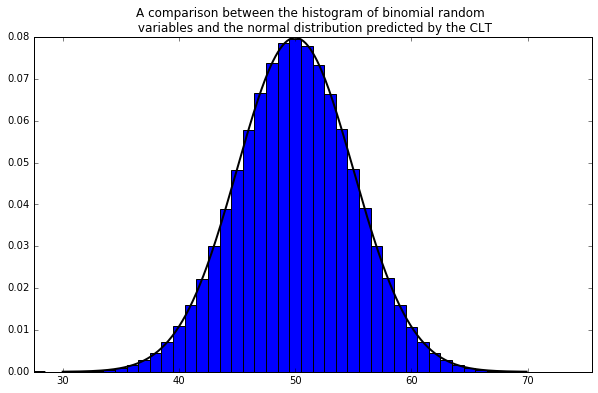

In [2]:
n = 100
p = 0.5
sample_size = 1000000

bin_var = binom.rvs(n=n,p=p,size=sample_size)
print(bin_var[:100])

# make a histogram
bins=sc.arange(bin_var.min(),bin_var.max()+2)-.5
plt.hist(bin_var, bins=bins, normed=True)

# The Central Limit Theorem says that the sum of Bernoulli variables (=Binomial) 
# is approximately a normal random variable with mu = n*p and variance = n*p*(1-p).
# We can also approximate this with the computed values
mu = bin_var.mean(); print(mu-n*p)
sigma = bin_var.std(); print(sigma - sc.sqrt(n*p*(1-p)))

x = sc.arange(mu-4*sigma,mu+4*sigma,0.1);
pdf = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, pdf, linewidth=2, color='k')

plt.xlim(bin_var.min()-.5,bin_var.max()+.5)
plt.title("A comparison between the histogram of binomial random \n variables and the normal distribution predicted by the CLT")
plt.show()

We can evaluate how likely it is to see less than k (out of 100) heads by evaluating 
$$
F(k) = \int_{-\infty}^k f(x) dx 
$$
where $f$ is the probability density function plotted above. 

The idea of hypothesis testing is the following. We assume the *null hypothesis* that the coin is fair (p=0.5) and choose a significance level $\alpha = 0.5$. We perform the test to see how many heads we get, say $k=60$. If the *$p$-value* $= 1-F(k)$ is smaller than $\alpha$, we reject the null hypothesis and declare the coin to be biased. 

## Normalized scores

It is often convenient to renormalize the variables, defining the *standard score* or *z-score* by 
$$
z = \frac{x - \bar{x}}{s}. 
$$
Here, $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$ and $s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar x)^2$ are the sample mean and variances. 

The standard score, $z$, will be approximately normally distributed with mean $0$ and variance $1$. This is called the *standard normal distribution*. The standard score is the signed number of standard deviations by which an observation differs from the mean. 


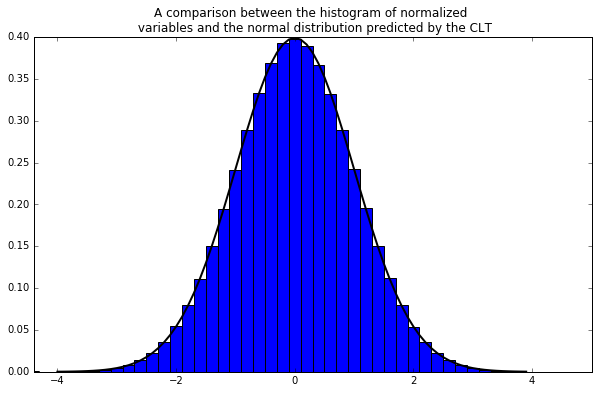

In [3]:
z = (bin_var - mu)/sigma;
bins_std = (bins - mu)/sigma;
plt.hist(z, bins=bins_std, normed=True)

x = sc.arange(-4,4,0.1);
pdf = norm.pdf(x) # default values: loc=0, scale=1
plt.plot(x, pdf, linewidth=2, color='k')

plt.xlim(z.min(),z.max())
plt.title("A comparison between the histogram of normalized \n variables and the normal distribution predicted by the CLT")
plt.show()

## Hypothesis testing example: the z-test

Let's try to determine whether the following statement is true: 
$$
\text{In Utah, there are 50% men and 50% women.}
$$


We take as null hypothesis that the proportion, $p$, of women is  is 0.5
$$
H_0: p = 0.5
$$
We set the significance level as $\alpha = 0.5$. 

Now, we need a sample...we can consider our class survey with 34 responses. 

In [4]:
Male = 0
Female = 1
class_gender = pd.Series([Male, Male, Male, Male, Male, Male, Female, Male, Female, \
Male, Male, Female, Female, Male, Male, Female, Female, Male, Female, Male, Male, \
Male, Female, Male, Male, Female, Female, Male, Male, Male, Male, Male, Male, Male])

num_female = class_gender.sum()
print(num_female)

n = class_gender.size
print(n) 

x_bar = num_female/n
print( x_bar)

10
34
0.29411764705882354


According to our survery, 10 of 34 people are women, so we have $\bar x = 0.29$. 

To proceed, we conduct a z-test, which is the same as before, except now we use the normalized 'z-values', 
$$
z = \frac{\bar{x} - .5}{s/\sqrt{n}}. 
$$
The CLT would imply that the $z$ score is distributed according to the "standard" normal distribution with mean $\mu=0$ and standard deviation $\sigma = 1$. 

In [5]:
s = class_gender.std();
print(s)

z = (x_bar - .5)/ (s/sc.sqrt(n)) 
print(z)

0.4624972900628803
-2.59566947048


How unlikely is it to see a z-score less than $z = -2.6$? 
$$
\text{p-value} = \int_{-\infty}^z f(x) dx = F(z)
$$
We can compute this using the function norm.cdf (with default arguments 'loc=0' and 'scale=1'.

In [6]:
p_value = norm.cdf(z)
print(p_value)

0.00472034168027


Under the assumption of the null hypothesis, we would only see a sample size this extreme $p=0.4\%$ of the time. Since the $p$ value is less than our chosen signficance level, $\alpha = 5\%$, we reject the null hypothesis and conclude that in Utah there are fewer than 50% women. 

**What's wrong with this finding?**

The proceedure we used for the hypothesis test was correct.

However, the students were **not independently sampled from the population** as is assumed in the CLT! If we wanted to address this question, we'd have to account for the fact that the survey was taken at a university in a STEM course, both of which bias the sample (in opposite directions). This is one reason that polling (inference from survey data) is very challenging. 

The 2010 census shows that the percentage of females in Utah is 49.8%.
http://www.census.gov/quickfacts/table/SEX205210/49,4967000

## What to do for smaller sample sizes? Student's t-test

When $n$ is small, the Central Limit Theorem can no longer be used. In this case, if the samples are drawn from an approximately normal distribution, then the correct distribution to use is called the Student's t distribution with $\nu = n-1$ degrees of freedom. The probability density function (pdf) for the student's t distribution is not pretty (Google it!) but it is built into scipy, so we can compare the student's t-test to the normal distribution. 

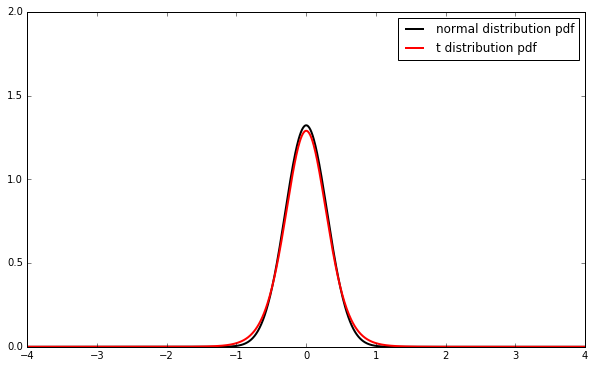

<function __main__.compare_distributions>

In [7]:
# there is some trouble with this package for some python versions
# if it doesn't work, don't worry about it
from ipywidgets import interact 

samp_mean = 0
samp_std_dev = 1

x = sc.linspace(samp_mean-4*samp_std_dev,samp_mean+4*samp_std_dev,1000);
def compare_distributions(sample_size):
    pdf1 = norm.pdf(x, loc=samp_mean, scale=samp_std_dev/sc.sqrt(sample_size))
    pdf2 = t.pdf(x,df=sample_size-1,loc=samp_mean, scale=samp_std_dev/sc.sqrt(sample_size))
    plt.plot(x, pdf1, linewidth=2, color='k',label='normal distribution pdf')
    plt.plot(x, pdf2, linewidth=2, color='r',label='t distribution pdf')
    plt.xlim(x.min(),x.max())
    plt.ylim(0,2)
    plt.legend()
    plt.show()
    
interact(compare_distributions,sample_size=(2,20,1))

The student's t distribution has "heaveier tails" than the normal distribution. For a sample size greater than $\approx 20$, the normality assumption is generally accepted as reasonable. 

## Types of error in hypothesis testing 

In hypothesis testing, there are two types of errors. A *type I error* is the incorrect rejection of a true null hypothesis (a "false positive"). A *type II error* is incorrectly accepting a false null hypothesis (a "false negative"). Depending on the application, one error can be more consequential than the other. 

![](InferenceErrors.png)
$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad$ 
source: [wikipedia](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)

The probability of making a type I (false positive error) is the significance level $\alpha$. 

**Examples**

**(1)** In drug testing, we take the null hypothesis (H0): "This drug has no effect on the disease." A type I error detects an effect (the drug cures the disease) that is not present. A type II error fails to detect an effect (the drug cures the disease) that is present. 

**(2)** In a trial, we take the null hypothesis (H0): "This man is innocent." A type I error convicts an innocent person. A type II error lets a guilty person go free. 

## P hacking

Recall that the p-value measures how extreme the observation is and is compared to the significance level. Some comments about the p-value:
1. A p-value is a probability calculated assuming that $H_0$ is true. 
+ The smaller the p-value, the stronger the evidence against $H_0$.
+ A p-value is not the probability that the null hypothesis is true or false. It is the probability that an erroneous conclusion is reached.

Recently the *misuse* of hypothesis testing (p-values) has raised considerable controversy. Basically, if you do enough hypothesis tests, eventually you'll have a Type I (false positive) error. This is a real problem in a world with tons of data in which it is easy to do many, many hypothesis tests automatically. 

To illustrate this, we'll do some experiments. We do a student's t-test (the hypothesis test when the sample size is small) for coin flipping using a fair coin and choosing a significance level of $\alpha = 0.01$. We want to know: how frequently do we get a type 1 (false positive) error? 

In [8]:
p = 0.5 # the coin I'm using is fair
sample_size = 100

alpha = 0.01

num_experiments = 10000
num_errors = 0
for i in sc.arange(num_experiments):
    coin_flips = bernoulli.rvs(p=p, size=sample_size)
    x_bar = coin_flips.mean()
    s = coin_flips.std()
    z = (x_bar - p)/ (s/sc.sqrt(sample_size)) 
    p_value = 2*norm.cdf(-abs(z))
    if (p_value<alpha):
        num_errors = num_errors + 1
    
print("Of the "+str(num_experiments)+" experiments, we had a Type 1 error " + str(num_errors)+ " times")
print("Percentage of errors: " + str(100*num_errors/num_experiments) + "%")

Of the 10000 experiments, we had a Type 1 error 126 times
Percentage of errors: 1.26%


As we would expect, about $1\%$ of the time, we get a type 1 (false positive) error. 

You can read more about P hacking here:

R. Nuzzo, Scientific method: Statistical errors, Nature (2014) [link](http://www.nature.com/news/scientific-method-statistical-errors-1.14700)

J. Cohen, The Earth is Round (p<0.05), American Psychologist (1994) [link](http://ist-socrates.berkeley.edu/~maccoun/PP279_Cohen1.pdf)

## A/B testing
A/B testing is a method of comparing two or more versions of an advertisement, webpage, app, etc. We set up an experiment where the variants are shown to users at random and statistical analysis is used to determine which is best. AB testing is the *de facto* test for many business decisions.  

**Example.** A/B testing was extensively used by President Obama during his 2008 and 2012 campaigns to  develop 
* optimized fund-raising strategies,  
* get-out-the-vote programs that would be most beneficial, and 
* target ads to the most susceptible audiences. 

Read more here:
[Wired story on Obama and A/B testing](http://www.wired.com/2012/04/ff_abtesting/)

**Example.** Suppose your company is developing an advertisement. The art department develops two internet ads: "Ad A" and "Ad B". Your job is to figure out which is better. 

You decide to do an experiment: You use Google ads to randomly show 1000 internet users Ad A and 1000 internet users Ad B. 

It turns out that 500 Ad A viewers click on the ad while 550 Ad B viewers click on the ad? Obviously Ad B did better, but is the difference "significant" enough to say that Ad B is better? Or perhaps Ad B just got lucky in this test? 

In homework 3, you’ll answer this question. More generally, this is a question about the difference between population proportions. 

## Inferences concerning a difference between population proportions
We consider comparing the population proportions of two different populations. 

We make the following definitions:
- $N_A$ is the number of surveyed people from population $A$  
- $n_A$ is the number of successes from population $A$
- $p_A = n_A/N_A$ is the proportion of successes from population $A$

Similarly, we define 
- $N_B$ is the number of surveyed people from population $A$  
- $n_B$ is the number of successes from population $B$
- $p_B = n_B/N_B$ is the proportion of successes from population $B$

We make the null hypothesis:
$$
H_0\colon \text{$p_A$ and $p_B$ are the same, that is, } p_A - p_B = 0.
$$
That is, the proportion of successes in the two populations is the same. 

We'll take it as a fact (see Devore Ch. 9.4 or Math 3070) that: 
- $n_A/N_A$ is approximately a normal random variable with mean $p_A$ and variance $\sigma_A^2 = p_A(1-p_A)/N_A$ 
- $n_B/N_B$ is approximately a normal random variable with mean $p_B$ and variance $\sigma_B^2 = p_B(1-p_B)/N_B$
- $n_A/N_A - n_B/N_B$ is approximately a normal random variable with mean $\mu = 0$ and variance $\sigma^2 = \sigma_A^2 + \sigma_B^2$. 
- The standardized variable 
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
has is approximately  distributed according to the standard normal distribution when $H_0$ is true. Here $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ and $\hat{q} = 1-\hat{p}$. 

From the data, we estimate the mean, $\mu$, to be  $p_A - p_B$. 

## Example: 1954 Salk polio-vaccine experiment

In 1954, polio was widespread and a new vaccine of unknown efficacy was introduced. To test the efficacy, in a double-blind study, two groups of children were give injections: one contained the vaccine and the other contained a placebo. 

Let $p_A$ and $p_B$ be the proportions of the children receiving the placebo and vaccine injections, respectively. We formulate the null hypothesis that 
$$
H_0\colon p_A - p_B \leq 0,
$$
that is, the vaccine is not effective.
The alternative hypothesis is that 
$$
H_a\colon p_A - p_B >0, 
$$
that is, a vaccinated child is less likely to contract polio than a child receiving the placebo.
We choose a significance level of $\alpha = 0.01$. 

An experiment was conducted with the following results: 
\begin{align*}
&\text{Placebo:} \quad N_A = 201,229, \quad n_A = 110 \\
&\text{Vaccine:} \quad N_B = 200,745, \quad n_B = 33.
\end{align*}

As a first step to understanding the data, we consider the distributions for $n_A/N_A$ and $n_B/N_B$ independently. 
We know that 
$n_A/N_A$ is approximately a normal random variable with mean $p_A$ and variance $\sigma_A^2 = p_A(1-p_A)/N_A$ and a similar statement holds for $n_B/N_B$. Let's see how different these two variables look by plotting their probability density functions. 

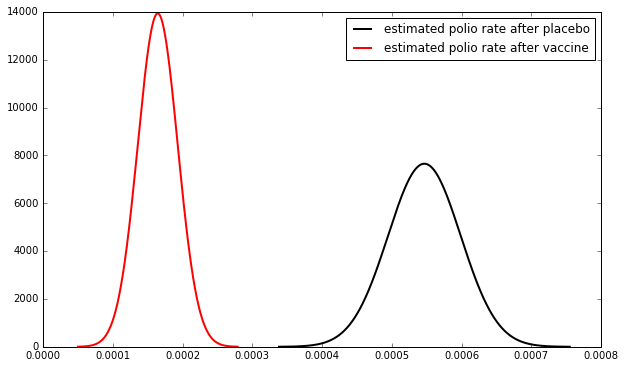

In [9]:
nA = 110
NA = 201229
pA = nA/NA
muA = pA
sigmaA = sc.sqrt(pA*(1-pA)/NA)

xA = sc.linspace(muA-4*sigmaA,muA+4*sigmaA,1000);
pdfA = norm.pdf(xA, loc=muA, scale=sigmaA)
plt.plot(xA, pdfA, linewidth=2, color='k',label='estimated polio rate after placebo')

nB = 33
NB = 200745
pB = nB/NB
muB = pB
sigmaB = sc.sqrt(pB*(1-pB)/NB)

xB = sc.linspace(muB-4*sigmaB,muB+4*sigmaB,1000);
pdfB = norm.pdf(xB, loc=muB, scale=sigmaB)
plt.plot(xB, pdfB, linewidth=2, color='r',label='estimated polio rate after vaccine')

plt.legend()
plt.show()

The probability density functions look very distinct! It doesn't seem likely that  $n_A/N_A$ and $n_B/N_B$ were drawn from populations with the same mean. 

Now we perform the hypothesis test and see what the probability of the outcome is under the assumption of the null hypothesis. 

In [10]:
phat = NA*pA/(NA+NB) + NB*pB/(NA+NB)
qhat = 1-phat

z = (pA - pB)/sc.sqrt(phat*qhat*(1/NA + 1/NB)) 
print(z)

p_value = 1-norm.cdf(z)
print(p_value)


6.42581277008
6.55834275776e-11


The probability that an erroneous conclusion is reached, under the assumption of the null hypothesis, is $6.6\times10^{-11}$, way less than $\alpha$. We reject the null hypothesis and declare that the vaccine is a success! (Sorry autism conspiracy theorists.) 